In [67]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import lstm, time #helper libraries

import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [68]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    # Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend(fontsize=14)

In [62]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [63]:
%%time
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')

CPU times: user 689 ms, sys: 5.48 ms, total: 695 ms
Wall time: 693 ms


In [64]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 7s - loss: 0.0055 - val_loss: 8.2808e-04


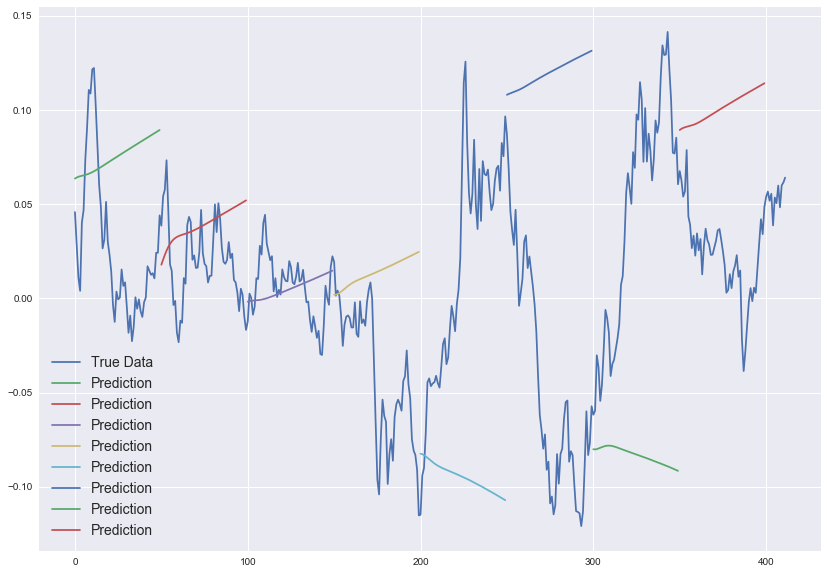

In [69]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
plot_results_multiple(predictions, y_test, 50)